# START

In [1]:
import warnings; warnings.simplefilter('ignore')

import random

import pandas as pd
import numpy as np
import os
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

project_dir = r'/content/drive/My Drive/Colab Notebooks/'

%matplotlib inline


In [2]:
# os.listdir(project_dir + 'data/u3/')
in_file = project_dir + 'data/u3/' + 'data_flats.csv'

## 2.3

In [3]:
data = pd.read_csv(in_file ,sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,240.0,1,0,7,3,0,16,1,2.590241,1.131260,13.575119,1.131260,0.145700,0.177975,2.158587,0.600973,1.080934,5.419893,65.038716,0.274985,3.299822,1.422391,10.918587,13.100618,13.675657,15.156211,10.814172,1.676258,0.485841,3.065047,1.107594,8.148591,3.516513,2.392353,6.715026,0.884350,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,229.0,1,0,6,1,1,3,0,0.936700,0.647337,7.620630,0.635053,0.147754,0.273345,0.550690,0.065321,0.966479,3.411993,40.943917,0.065263,0.783160,9.503405,3.103996,6.444333,8.132640,8.698054,6.910568,3.424716,0.668364,2.000154,8.972823,6.127073,1.161579,2.543747,1.852560,0.686252,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,1183.0,1,0,5,1,0,0,1,2.120999,1.637996,17.351515,1.445960,0.049102,0.158072,0.374848,0.453172,0.939275,1.277658,15.331896,0.328756,3.945073,5.604800,2.927487,6.963403,8.054252,9.067885,5.752368,1.375443,0.733101,1.239304,1.978517,0.767569,1.952771,0.621357,0.841254,1.510089,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,NaN,1,0,17,6,0,11,4,1.489049,0.984537,11.565624,0.963802,0.179441,0.236455,0.078090,0.106125,0.451173,4.291432,51.497190,0.131597,1.579164,2.677824,14.606501,17.457198,18.309433,19.487005,27.892717,0.811275,0.623484,1.950317,6.483172,7.385521,4.923843,3.549558,10.903161,0.622272,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,562.0,4,2,25,2,0,10,93,1.257186,0.876620,8.266305,0.688859,0.247901,0.376838,0.258289,0.236214,0.392871,0.853960,10.247521,0.071480,0.857764,11.616653,1.721834,0.046810,0.787593,2.578671,9.155057,1.969738,0.220288,2.544696,3.975401,3.610754,0.307915,1.864637,0.991683,0.892668,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [5]:
data.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

## 2.6

In [6]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [7]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [8]:
test_data['two'].isna()

0    False
1     True
2    False
Name: two, dtype: bool

In [9]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


In [10]:
test_data.dropna(axis=1)

,one
0,1
1,3
2,0


In [11]:
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


In [12]:
test_data.two.fillna(test_data.two.mean())

0    2.0
1    1.5
2    1.0
Name: two, dtype: float64

In [13]:
# Задание 2.6.6

vis_data = pd.read_csv(project_dir + 'data/u3/'  + 'train.csv', encoding = 'ISO-8859-1', low_memory = False)
# vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

vis_data.info()
# result

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [14]:
# Получаем самое частое название штата (важно: не количество! а индексное значение!)
vis_data.state.value_counts().head(1).keys()[0]

'MI'

In [15]:
# сколько пропущено всего значений в столбце state
vis_data.state.isna().sum()

93

In [16]:
# result = vis_data['state'].fillna('MI')
result = vis_data['state'].fillna(vis_data.state.value_counts().head(1).keys()[0])


In [17]:
# Задание 2.6.7

data.shape

(30469, 56)

In [18]:
data.dropna().shape

(13652, 56)

In [19]:
data.dropna(inplace=True)

In [20]:
data.shape

(13652, 56)

## 2.8

### minmax нормализация

MinMaxScaler и StandardScaler сохраняют параметры, с которыми проводят нормализацию. Поэтому после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными.

In [21]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 1.        ,        nan],
       [1.        ,        nan, 1.        ],
       [0.        , 0.        , 0.        ]])

### std нормализация

In [22]:
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124,  1.        ,         nan],
       [ 1.33630621,         nan,  1.        ],
       [-1.06904497, -1.        , -1.        ]])

In [23]:
# Задание 2.8.3

vis_data.balance_due.isna().sum()

0

In [24]:
balance = vis_data.balance_due.values.reshape(-1,1)
balance

array([[305.],
       [ 75.],
       [  0.],
       ...,
       [  0.],
       [  0.],
       [  0.]])

In [25]:
min_val = scaler.fit_transform(balance).min()
round(min_val, 5)

-13.14733

## 2.10

In [26]:
# Задание 2.10.3

bal_sqrt = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
# sns.boxplot(np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]))

abs(bal_sqrt.median() - bal_sqrt.mean())


0.4525960609393067

In [27]:
# 

apartment = pd.read_csv(project_dir + 'data/u3/'  + 'latlons.csv', low_memory = False)


apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121769 entries, 0 to 121768
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   address  121769 non-null  object 
 1   lat      121762 non-null  float64
 2   lon      121762 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.8+ MB


In [28]:
apartment.sample(5)

,address,lat,lon
36519,"11637 ruth, Detroit MI",42.395628,-83.016080
4160,"9164 grayton, Detroit MI 48224",42.416677,-82.940192
39798,"8120 jefferson, Detroit MI",42.351496,-82.992695
81958,"14276 kentucky, Detroit MI",42.392851,-83.157978
13445,"20510 schoolcraft, Detroit MI",42.386416,-83.242347


In [29]:
# data.columns.sort_values()
data.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

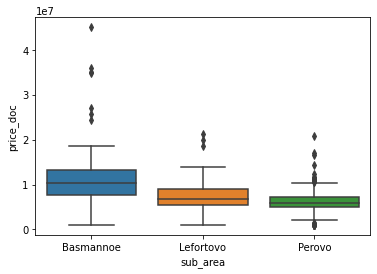

In [30]:
# Задание 2.10.4

# data.sub_area.value_counts().sort_index().index

# Lefortovo
# Perovo
# Basmannoe

sub_area_filter = ['Lefortovo', 'Perovo', 'Basmannoe']

sns.boxplot(x='sub_area', y='price_doc', data=data.query('sub_area in @sub_area_filter'))

In [31]:
data.query('sub_area in @sub_area_filter')[['sub_area','price_doc']].groupby('sub_area').mean()

,price_doc
sub_area,
Basmannoe,1.158772e+07
Lefortovo,7.425565e+06
Perovo,6.073200e+06


## 2.12

In [32]:
latlons = pd.read_csv( project_dir + 'data/u3/' + 'latlons.csv')
vis_data = pd.concat([vis_data, latlons], axis=1)

In [33]:
latlons.columns

Index(['address', 'lat', 'lon'], dtype='object')

In [34]:
# Задание 2.12.6
vis_data.columns.sort_values()


Index(['address', 'admin_fee', 'agency_name', 'balance_due', 'city',
       'clean_up_cost', 'collection_status', 'compliance', 'compliance_detail',
       'country', 'discount_amount', 'disposition', 'fine_amount',
       'grafitti_status', 'hearing_date', 'inspector_name', 'judgment_amount',
       'lat', 'late_fee', 'lon', 'mailing_address_str_name',
       'mailing_address_str_number', 'non_us_str_code', 'payment_amount',
       'payment_date', 'payment_status', 'state', 'state_fee', 'ticket_id',
       'ticket_issued_date', 'violation_code', 'violation_description',
       'violation_street_name', 'violation_street_number',
       'violation_zip_code', 'violator_name', 'zip_code'],
      dtype='object')

In [35]:
vis_data[['balance_due', 'discount_amount']]

,balance_due,discount_amount
0,305.0,0.0
1,75.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
250301,0.0,0.0
250302,0.0,0.0
250303,0.0,0.0
250304,0.0,0.0


In [36]:
# Задание 2.12.6

pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_features


array([[  1., 305.,   0., ...,   0.,   0.,   0.],
       [  1.,  75.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [37]:
poly_features.shape

(250306, 10)

In [38]:
poly_features.mean(axis=0) # answer = 6

array([ 1.00000000e+00,  2.22449058e+02,  1.25166796e-01,  4.17195810e+05,
       -9.85531709e+00,  1.17817392e+01,  2.04200098e+09,  1.17924384e+05,
       -1.49564074e+02,  3.07417605e+03])

In [39]:
# Задание 2.12.7

# ticket_issued_date

datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())
datetime_vals.head()


0   2004-03-16 11:40:00
1   2004-04-23 12:30:00
2   2004-04-26 13:40:00
3   2004-04-26 13:30:00
4   2004-04-26 13:00:00
Name: ticket_issued_date, dtype: datetime64[ns]

In [40]:
vis_data['is_weekend'] = datetime_vals.dt.weekday > 4
vis_data['holiday'] = datetime_vals.dt.weekday

In [41]:
vis_data['is_weekend'].value_counts()

# answer = 1620

False    248686
True       1620
Name: is_weekend, dtype: int64

In [42]:
# Задание 2.12.8

data.sample(9)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
1906,1911,32,16.0,2.0,Shhukino,2854.0,4,7023.0,5,0,4508.0,3,0,11,5,0,7,5,3.174464,1.840254,22.015093,1.834591,1.200589,0.437468,1.423567,0.093963,0.189023,2.352901,28.234810,0.059570,0.714841,4.821072,5.804622,8.719417,9.573889,10.748022,25.143651,2.530488,0.333750,2.433278,1.784438,2.412327,1.509329,2.446561,2.524434,1.935642,1.190091,0.865508,0.455640,0.537837,1.774481,0.938102,9.545947,7.615268,satisfactory,6700000
12913,12918,61,43.0,2.0,Gol'janovo,5041.0,6,11081.0,7,0,125.0,3,0,5,3,0,5,3,3.956008,1.515195,15.522005,1.293500,0.177922,0.225060,1.172258,0.512741,0.745967,5.877840,70.534082,0.182961,2.195537,2.096855,8.731213,10.914210,11.662222,13.458933,14.951171,1.385087,0.386997,2.413759,5.228801,5.783284,2.154774,1.820027,2.785294,0.225060,1.143613,1.685502,0.493180,0.225060,0.673637,0.670911,8.979756,7.291530,good,9100000
5729,5734,37,19.0,10.0,Krjukovo,5278.0,6,10529.0,6,0,30.0,2,0,4,1,0,4,1,28.217041,21.917832,262.406681,21.867223,0.067700,0.326715,17.851997,0.374893,0.430858,1.269957,15.239481,0.103893,1.246713,20.242994,33.746875,36.390700,37.167675,38.416795,44.943678,2.470786,0.440262,6.710272,6.651897,29.089736,14.508252,2.719687,4.314332,3.315042,0.859733,1.092913,1.550710,0.326715,5.416013,0.946713,7.509237,0.827362,no data,4800000
25583,25588,33,17.0,4.0,Krjukovo,5278.0,6,10529.0,6,0,30.0,2,0,4,1,0,4,1,26.059367,21.197312,254.200791,21.183399,0.439558,0.546449,17.107203,0.326627,0.654529,0.987390,11.848685,0.071955,0.863464,19.403041,32.910430,35.532785,36.315593,37.557488,43.855132,0.513551,0.514816,5.950466,5.892091,28.369216,13.991474,2.757385,3.554526,4.110242,0.514816,0.569697,0.973696,0.546449,5.484851,0.510044,6.749430,1.285508,no data,4950000
29439,29444,32,17.0,3.0,Jaroslavskoe,2974.0,4,6119.0,6,0,320.0,1,1,13,3,0,3,5,7.881873,7.200757,73.072323,6.089360,0.132813,0.137435,1.974168,0.144919,2.095076,2.857890,34.294677,0.164142,1.969700,1.074736,9.798943,12.318114,12.962047,14.602125,3.792936,8.706523,0.385172,5.927977,7.694823,9.370400,1.074990,0.831834,4.644559,0.137435,0.997827,0.407031,0.830995,0.137435,1.452417,1.452573,0.269573,8.401475,good,4850000
23320,23325,40,20.0,14.0,Zjablikovo,3909.0,4,8294.0,5,0,810.0,0,0,5,1,0,5,0,1.266495,0.730444,8.765329,0.730444,0.164939,0.480107,1.950347,0.244927,1.815399,6.327905,75.934855,0.071828,0.861939,1.077040,11.464744,14.775241,16.305173,17.017691,3.152453,2.398437,0.798738,1.805317,2.097766,8.779689,5.812147,0.603478,1.950341,2.947446,0.418225,2.498325,1.314755,0.480107,1.789469,0.633395,13.577704,4.696669,poor,5300000
13534,13539,90,49.0,16.0,Solncevo,3953.0,5,9700.0,5,0,750.0,2,0,4,3,0,5,1,2.141808,1.077193,12.926322,1.077193,0.312871,0.311082,1.214655,0.363225,0.142701,2.135700,25.628398,0.039714,0.476562,1.376156,11.410137,14.127496,15.298874,16.158312,9.817322,0.816845,1.214363,2.030559,5.747925,8.383812,3.169345,1.844330,5.646155,5.558807,0.554017,1.108105,0.301993,0.311082,2.622671,1.580343,7.944798,4.122909,good,13500000
2447,2452,42,28.0,9.0,Pokrovskoe Streshnevo,922.0,2,3577.0,4,0,2643.0,4,0,10,2,0,5,4,3.969359,2.888869,19.494489,1.624541,1.768471,0.91762

In [43]:
data.ecology.value_counts().index

Index(['poor', 'good', 'satisfactory', 'excellent', 'no data'], dtype='object')

In [44]:
ecology_dict = dict(zip(['poor', 'good', 'satisfactory', 'excellent', 'no data'], [2, 3, 1, 4, 0]))
ecology_dict


{'excellent': 4, 'good': 3, 'no data': 0, 'poor': 2, 'satisfactory': 1}

In [45]:
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [46]:
round(data.ecology.mean(), 2)

2.33

In [47]:
pd.get_dummies(data.sub_area, drop_first=True).head()

,Akademicheskoe,Alekseevskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,Birjulevo Vostochnoe,Caricyno,Cheremushki,Danilovskoe,Dmitrovskoe,Donskoe,Filevskij Park,Gol'janovo,Golovinskoe,Hamovniki,Horoshevo-Mnevniki,Hovrino,Izmajlovo,Jakimanka,Jaroslavskoe,Jasenevo,Juzhnoe Medvedkovo,Juzhnoportovoe,Kapotnja,Kon'kovo,Koptevo,Krjukovo,Kuncevo,Kurkino,Lefortovo,Levoberezhnoe,Ljublino,Lomonosovskoe,Losinoostrovskoe,Mar'ina Roshha,Meshhanskoe,Metrogorodok,...,Nagatino-Sadovniki,Nagatinskij Zaton,Nekrasovka,Novo-Peredelkino,Novogireevo,Obruchevskoe,Ochakovo-Matveevskoe,Ostankinskoe,Pechatniki,Perovo,Pokrovskoe Streshnevo,Preobrazhenskoe,Presnenskoe,Prospekt Vernadskogo,Ramenki,Rostokino,Savelki,Savelovskoe,Severnoe,Severnoe Butovo,Severnoe Tushino,Shhukino,Sokol,Sokol'niki,Sokolinaja Gora,Solncevo,Sviblovo,Taganskoe,Tekstil'shhiki,Timirjazevskoe,Tverskoe,Veshnjaki,Vnukovo,Vostochnoe,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
data.sample(9)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,railroad_station_walk_km,railroad_station_walk_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
9438,9443,46,28.0,1.0,Meshhanskoe,1525.0,3,5752.0,3,0,2890.0,0,1,14,4,0,8,59,1.391212,0.959851,9.666748,0.805562,0.538630,0.153947,1.136152,0.952110,0.159326,0.762081,9.144977,0.219862,2.638346,11.411548,0.474691,1.720660,2.375133,3.915225,10.126697,2.465347,0.593258,1.457916,3.464345,6.236620,0.953311,0.515088,1.009754,1.129654,0.544010,0.243791,0.187894,0.153947,0.406680,0.436740,2.074597,1.416102,2,8200000
2645,2650,30,18.0,5.0,Izmajlovo,1313.0,4,4339.0,6,0,645.0,6,0,16,3,0,6,0,2.557348,1.917468,19.380092,1.615008,0.628046,0.592817,2.338247,0.426842,0.064629,4.295014,51.540170,0.038942,0.467307,4.047453,6.166112,8.392529,9.140939,10.934061,18.819908,0.863439,0.110243,2.670415,1.883464,2.396021,0.942419,1.943854,1.707073,0.882110,1.005637,1.176661,0.426073,0.592817,0.440153,0.449000,5.864434,5.173090,3,4950000
17989,17994,48,42.0,18.0,Nekrasovka,2395.0,5,7377.0,5,0,540.0,0,0,0,4,0,0,0,4.721045,3.776836,45.322032,3.776836,0.286711,0.214197,4.616176,0.017572,0.394108,1.923495,23.081939,0.035986,0.431838,5.946908,14.298225,18.418929,19.272537,20.549464,10.264218,5.439734,2.493236,8.106936,8.623789,13.591774,5.211201,1.451898,8.837248,5.599071,2.215104,4.778766,0.203466,0.214197,3.468289,0.912168,9.836242,7.288785,3,5335000
6503,6508,48,30.0,5.0,Meshhanskoe,1525.0,3,5752.0,3,0,2890.0,0,1,14,4,0,8,59,0.668212,0.534570,5.450834,0.454236,0.260701,0.150523,0.696378,0.201415,1.506593,2.129116,25.549387,0.092814,1.113769,13.218805,2.090538,0.016284,0.709651,2.103175,8.909128,1.281479,0.345492,1.979487,2.282761,5.704778,0.436181,0.371203,0.444040,1.559515,0.389158,0.135787,0.785896,0.150523,0.301751,0.343152,0.342728,0.551524,4,10500000
13286,13291,59,44.0,7.0,Severnoe Tushino,4116.0,5,9891.0,5,0,1145.0,3,0,1,2,0,5,0,2.553567,1.405681,16.868175,1.405681,0.478491,0.211121,1.816023,0.491905,1.729358,5.129364,61.552373,0.178461,2.141538,1.628472,11.838796,14.506291,15.267970,16.541199,20.816922,0.518451,0.670170,2.981037,7.596895,5.655967,1.741207,1.740330,9.404915,1.884545,0.339382,1.363342,0.301133,0.211121,0.350916,1.757022,24.055797,12.271080,1,8000000
13441,13446,54,32.0,17.0,Taganskoe,3318.0,5,9748.0,10,0,2301.0,3,1,24,1,1,19,56,0.927524,0.649963,7.799562,0.649963,0.121828,0.245334,0.949083,0.298436,0.365438,0.298815,3.585785,0.023180,0.278156,9.879420,0.857977,1.809797,2.514505,3.877841,4.625685,2.094750,0.147338,0.804294,0.769097,4.030472,0.786860,2.122369,1.836568,0.796770,0.236579,0.236579,1.579239,0.245334,0.166035,0.169972,2.137400,2.028409,4,12350000
724,727,92,92.0,3.0,Zamoskvorech'e,2224.0,4,4487.0,4,0,1815.0,2,3,13,1,0,5,73,2.245358,1.772453,4.818580,0.401548,0.233217,0.384485,0.577912,0.401853,2.538429,2.618538,31.422456,0.060916,0.730989,13.471169,3.933455,1.595653,0.460659,0.514619,6.726658,0.873608,0.322723,0.311100,1.631451,4.407646,0.977111,1.382442,1.070440,0.384485,0.269201,0.128299,1.011522,0.384485,0.200736,0.114296,1.578244,1.258834,4,24000000
2681,2686,57,36.0,8.0,Horoshevo-Mnevniki,3397.0,4,11085.0,5,0,1970.0,2,0,18,4,0,3,8,3.452471,2.428685,28.822660,2.401888,0.127747,0.757908,2.239941,0.600788,0.270807,3.333868,40.00

In [54]:
data.shape[1] + 82 - 1 

137

# END